<a href="https://colab.research.google.com/github/pankajroy97/Pankaj-Roy-LGMVIP--DataScience/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.columns.nunique()

135

In [6]:
data=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','weaptype1_txt','weapdetail']]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,weaptype1_txt,weapdetail
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,Explosive
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,Incendiary


In [7]:
#Rename our columns which analysis
data.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'country_txt':'Country',
                     'region_txt':'Region',
                     'provstate':'State',
                     'city':'City',
                     'attacktype1_txt':'Attack Type',
                     'targtype1_txt':'Target Type',
                     'targsubtype1_txt':"Target Subtype",
                     'gname':'Gang Name',
                     'weaptype1_txt':'Weapon Type',
                     'weapdetail':'Weapon Detail'},inplace=True)

In [8]:
data.head()

,Year,Month,Day,Country,Region,State,City,Attack Type,Target Type,Target Subtype,Gang Name,Weapon Type,Weapon Detail
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,Explosive
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,Incendiary


In [9]:
data.duplicated().sum()

14813

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(166878, 13)

###Handle null values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166878 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            166878 non-null  int64 
 1   Month           166878 non-null  int64 
 2   Day             166878 non-null  int64 
 3   Country         166878 non-null  object
 4   Region          166878 non-null  object
 5   State           166457 non-null  object
 6   City            166455 non-null  object
 7   Attack Type     166878 non-null  object
 8   Target Type     166878 non-null  object
 9   Target Subtype  157642 non-null  object
 10  Gang Name       166878 non-null  object
 11  Weapon Type     166878 non-null  object
 12  Weapon Detail   103764 non-null  object
dtypes: int64(3), object(10)
memory usage: 17.8+ MB


In [13]:
data.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                423
Attack Type           0
Target Type           0
Target Subtype     9236
Gang Name             0
Weapon Type           0
Weapon Detail     63114
dtype: int64

In [14]:
#Fill null values
data['State']=data['State'].fillna('Unknown')
data['City']=data['City'].fillna('Unknown')
data['Target Subtype']=data['Target Subtype'].fillna('Unknown')
data['Weapon Detail']=data['Weapon Detail'].fillna('Unknown')

In [15]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack Type       0
Target Type       0
Target Subtype    0
Gang Name         0
Weapon Type       0
Weapon Detail     0
dtype: int64

###Lets some EDA with this data

In [16]:
data['Country'].unique()
data['Country'].nunique()

205

In [17]:
data['Region'].unique()
data['Region'].nunique()

12

In [18]:
data['State'].unique()
data['State'].nunique()

2855

In [19]:
data['City'].unique()
data['City'].nunique()

36674

In [20]:
data['Attack Type'].unique()
data['Attack Type'].nunique()

9

In [21]:
data['Target Type'].unique()
data['Target Type'].nunique()

22

In [22]:
data['Target Subtype'].unique()
data['Target Subtype'].nunique()

113

In [23]:
data['Gang Name'].unique()
data['Gang Name'].nunique()

3537

In [24]:
data['Weapon Type'].unique()
data['Weapon Type'].nunique()

12

In [25]:
data['Weapon Detail'].unique()
data['Weapon Detail'].nunique()

19149

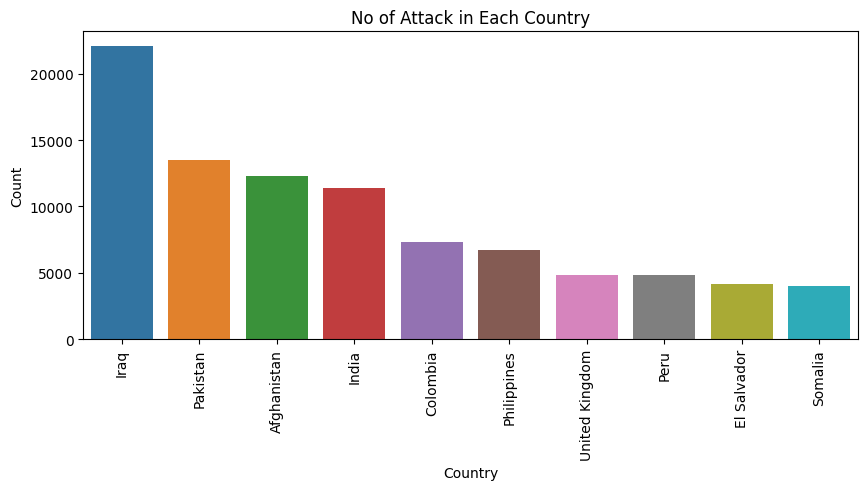

In [26]:
#Top 10 Attacking Country
x=data['Country'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values,label='No of Attack in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('No of Attack in Each Country')
plt.xticks(rotation=90)
plt.show()

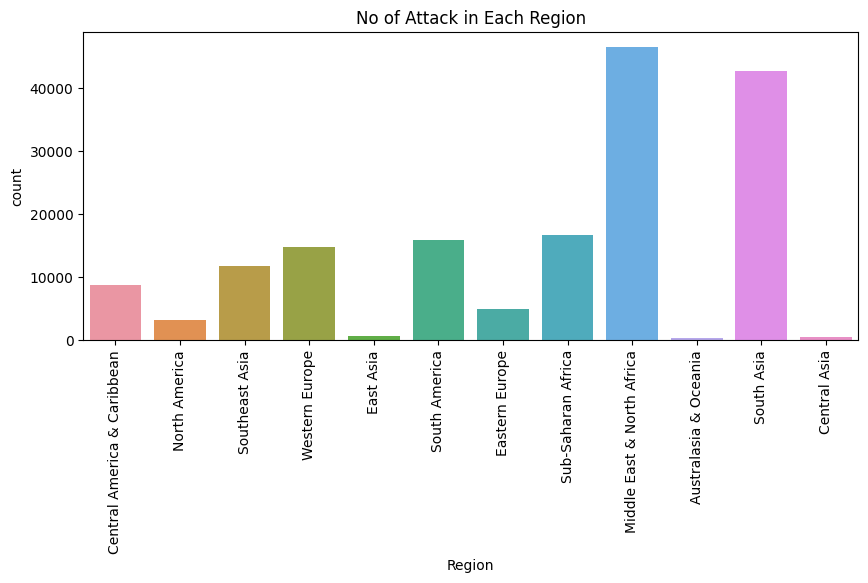

In [27]:
#Affected Region
plt.figure(figsize=(10,4))
sns.countplot(x=data['Region'])
plt.title('No of Attack in Each Region')
plt.xticks(rotation=90)
plt.show()

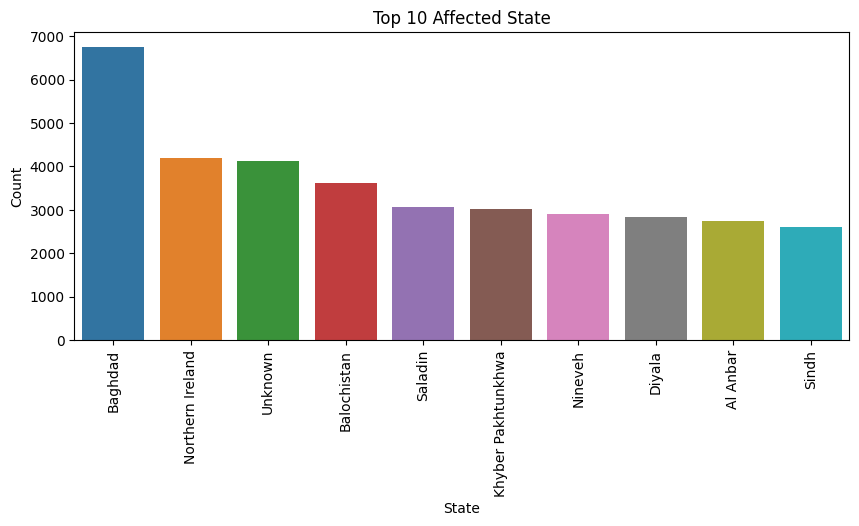

In [28]:
#Top 10 affected State
x=data['State'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values,label='No of Attack in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 Affected State')
plt.xticks(rotation=90)
plt.show()

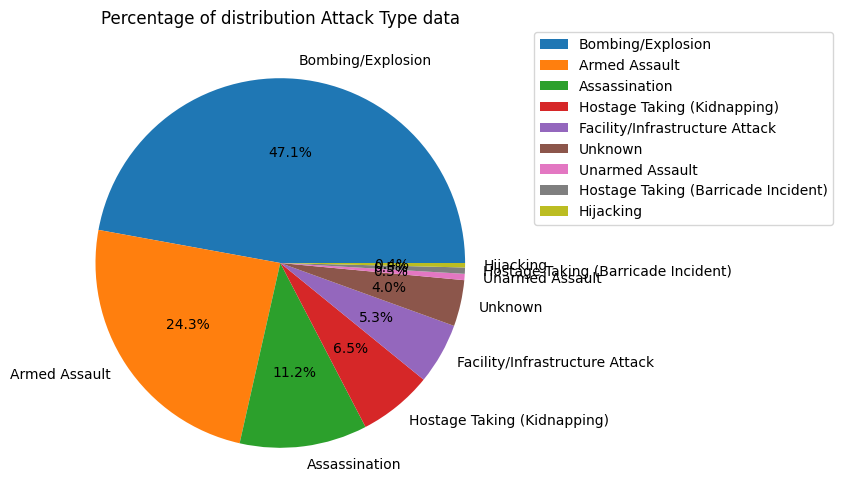

In [29]:
plt.figure(figsize=(10,6))
x1=data['Attack Type'].value_counts()
plt.pie(x=x1.values,labels=x1.index,autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Percentage of distribution Attack Type data')
plt.show()

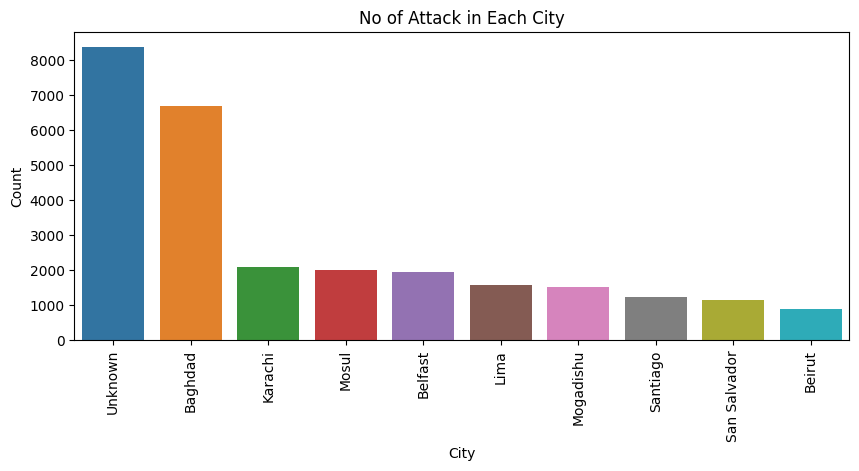

In [30]:
#target type
x=data['City'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values,label='No of Attack in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('No of Attack in Each City')
plt.xticks(rotation=90)
plt.show()

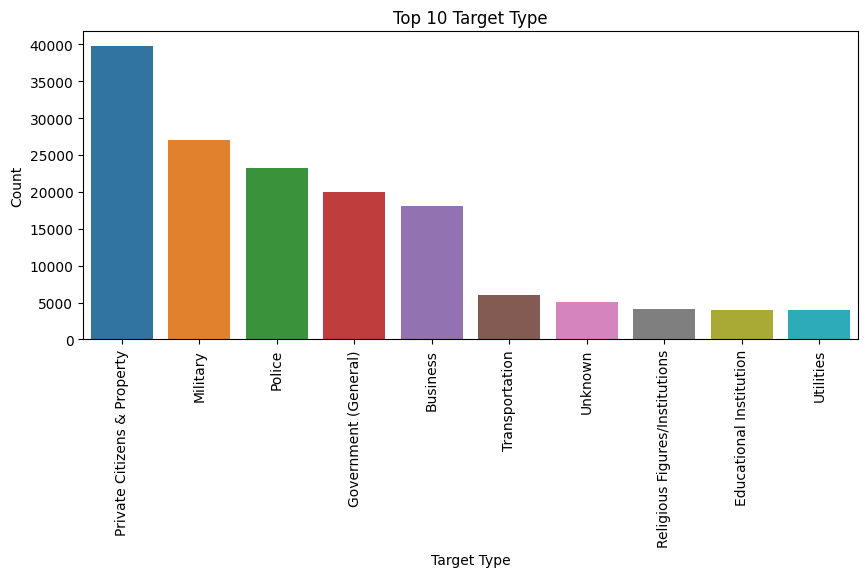

In [31]:
#Top 10 Target Type
x=data['Target Type'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values)
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.title('Top 10 Target Type')
plt.xticks(rotation=90)
plt.show()

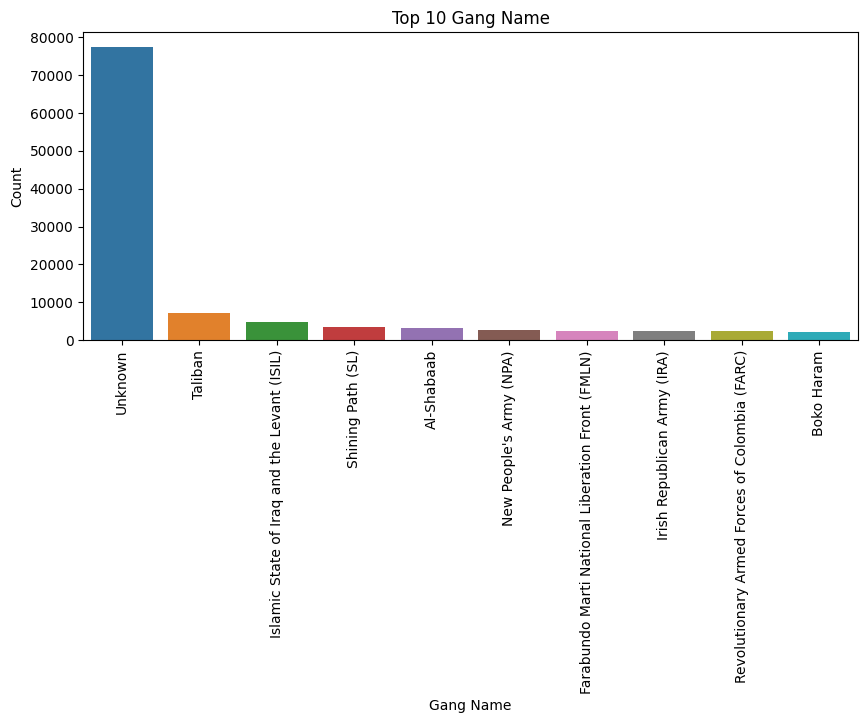

In [32]:
#Top 10 Gang Name involvement in this attacks
x=data['Gang Name'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values)
plt.xlabel('Gang Name')
plt.ylabel('Count')
plt.title('Top 10 Gang Name')
plt.xticks(rotation=90)
plt.show()

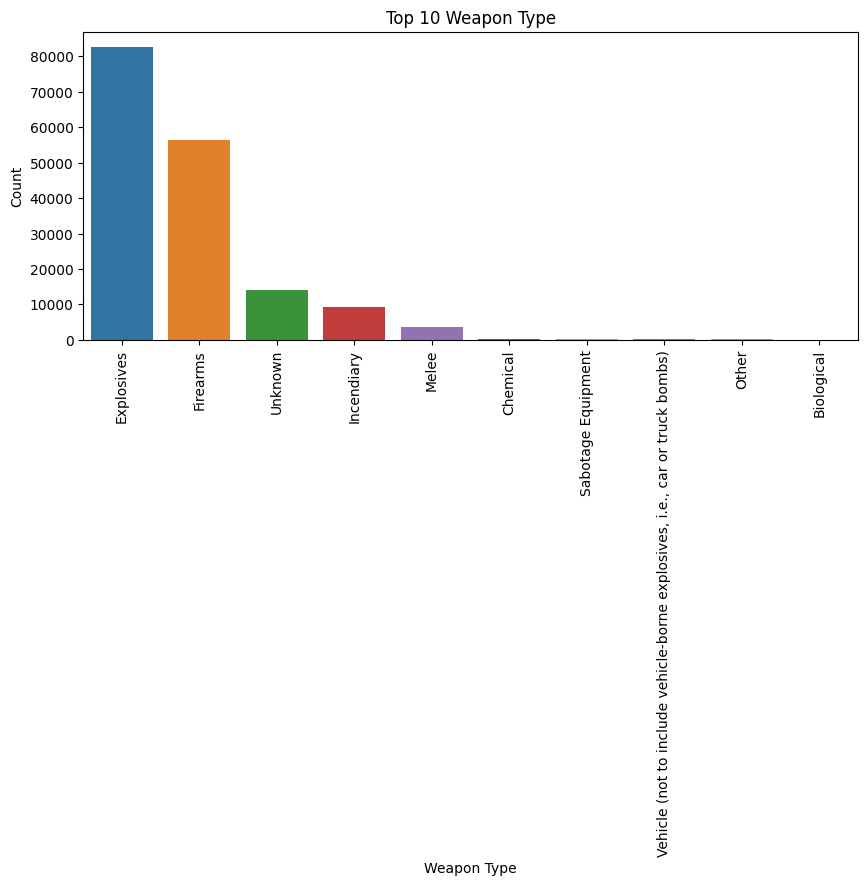

In [33]:
#Top 10 Weapon involvement in this attacks
x=data['Weapon Type'].value_counts()
x10=x.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=x10.index,y=x10.values)
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.title('Top 10 Weapon Type')
plt.xticks(rotation=90)
plt.show()

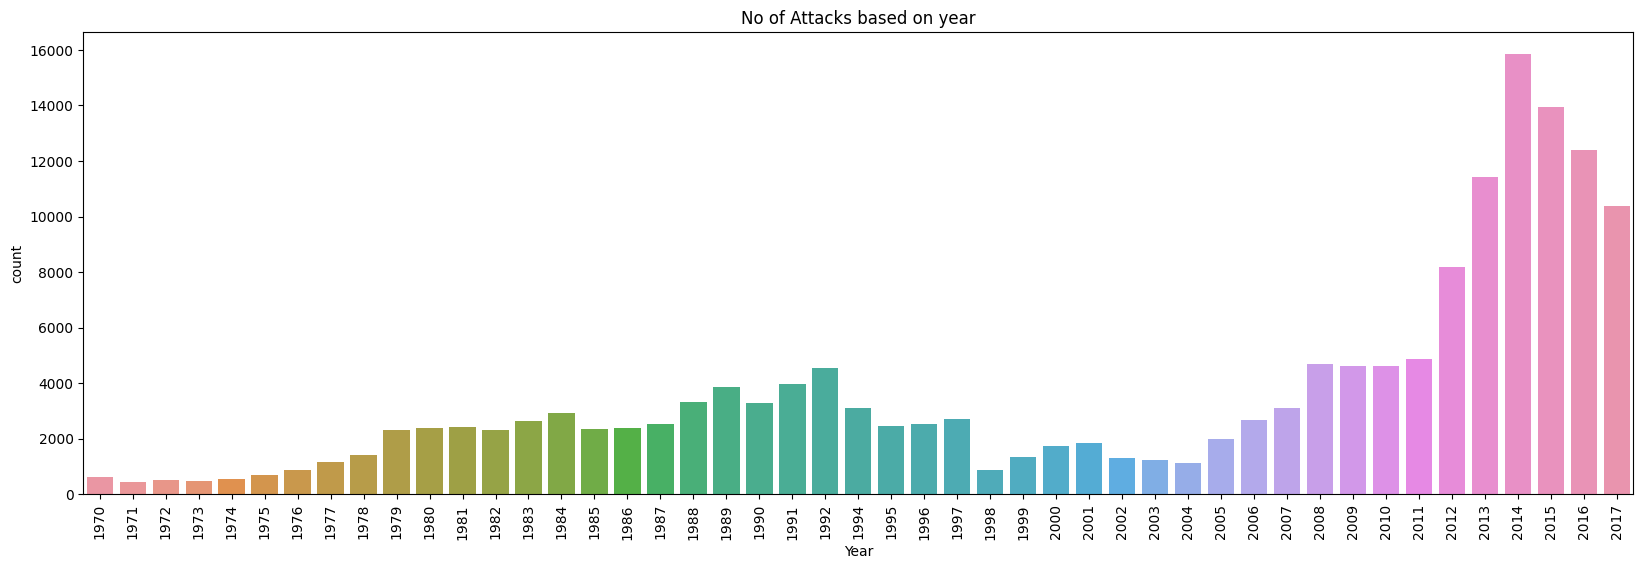

In [34]:
#No of Attacks based on year
plt.figure(figsize=(20,6))
sns.countplot(x=data['Year'])
plt.title('No of Attacks based on year')
plt.xticks(rotation=90)
plt.show()

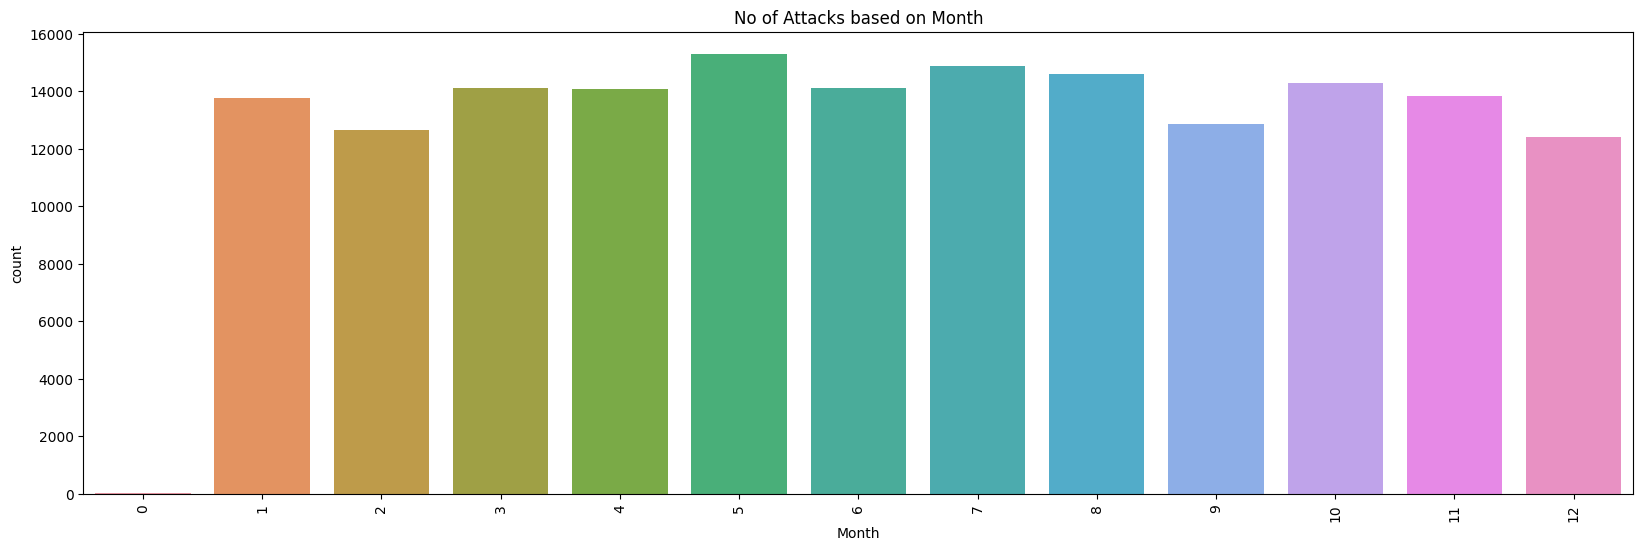

In [35]:
#No of Attacks based on Month
plt.figure(figsize=(20,6))
sns.countplot(x=data['Month'])
plt.title('No of Attacks based on Month')
plt.xticks(rotation=90)
plt.show()

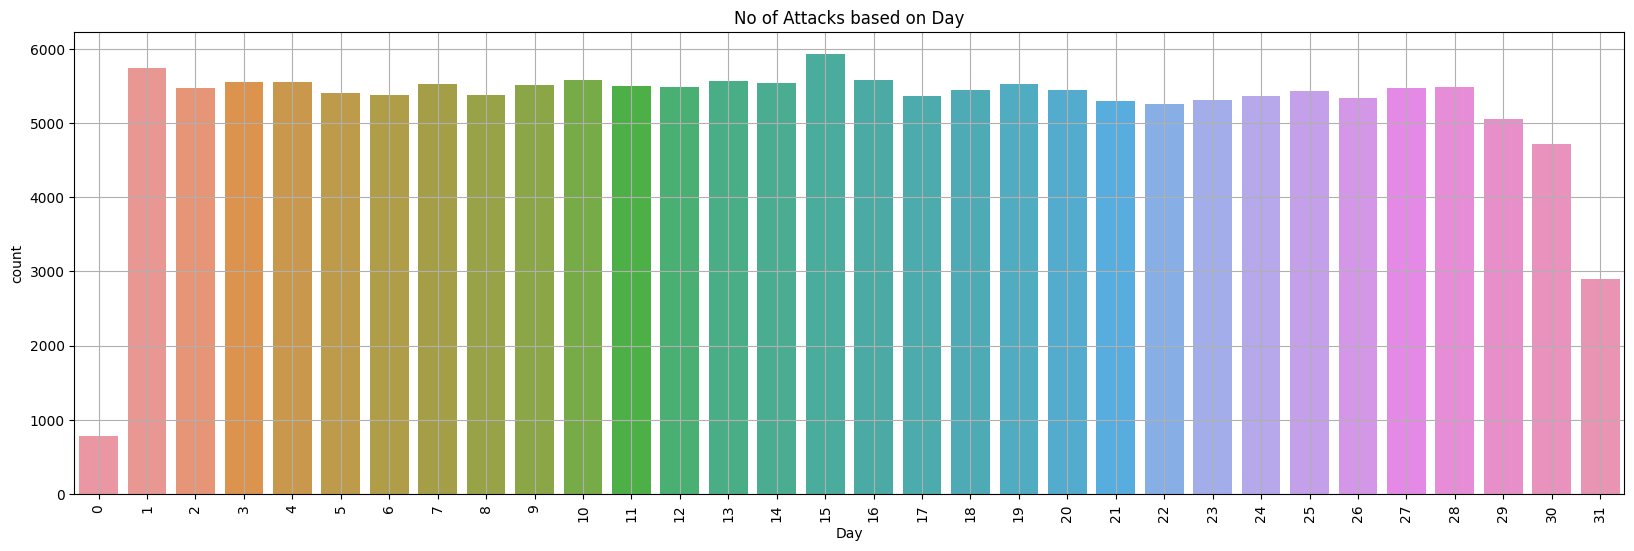

In [50]:
#No of Attacks based on Day
plt.figure(figsize=(20,6))
sns.countplot(x=data['Day'])
plt.title('No of Attacks based on Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

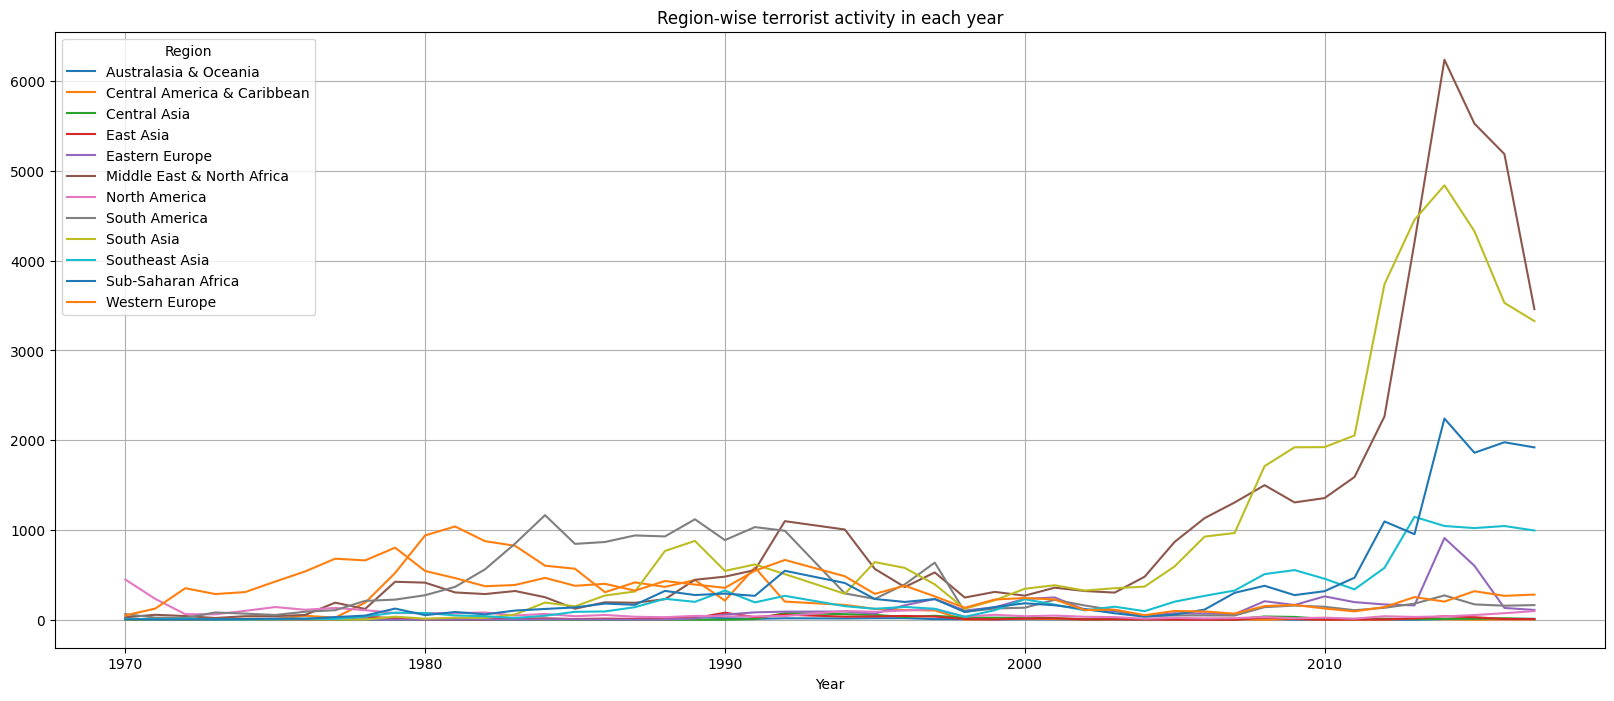

In [46]:
#Region-wise terrorist activity in each year
pd.crosstab(data['Year'],data['Region']).plot(kind='line',figsize=(20,8))
plt.title('Region-wise terrorist activity in each year')
plt.grid()
plt.show()

##Final Conclusion:-

1.Most attacks in Country-Iraq

2.Most Affected Region-Middle east & North Africa

3.Most affected State-Baghdad

4.Most Attacks Type - Bombing Explosion

5.Most affected State-Baghdad

6..Most targets by terrorist - Private Citizen /Propertity

7.Most Attacks Gang Name -Taliban

8.Most Weapon involvement in this attacks-Explosives

9.Most attacks in year-2014

10.Most attacks in Month-5

11.Most attacks in Day-15